In [0]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set()
sns.set(font_scale=1.5)

def get_minutes(start_date, end_date):
  date_delta = end_date - start_date
  return divmod(date_delta.days * 86400 + date_delta.seconds, 60)[0]

def millions(x, pos):
    return '%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

In [0]:
# Funds to distribute
COINS = 40000000

# Reference Dates
START_DATE = datetime.datetime(2018, 4, 1, 0, 0, 0)  # Example start date.
END_DATE = datetime.datetime(2218, 4, 1, 0, 0, 0)    # Example end date.

In [224]:
TOTAL_MINUTES = get_minutes(START_DATE, END_DATE)
print("Total Minutes between {} and {} = {}".format(START_DATE, END_DATE ,TOTAL_MINUTES))

# Exponential decay. Lambda
# ln(N) = -lt + C
# N(t) = e**C * e**(-lt) = N0 * e**(-lt)
#
# ln[N200]= -l(t200) + ln[N0]
# l = -( ln[N200] - ln[N0] ) / (t200)
# N200=1
# ln[N200] = 0
l = np.log(COINS) / TOTAL_MINUTES
print("Lambda = {}".format(l))

Total Minutes between 2018-04-01 00:00:00 and 2218-04-01 00:00:00 = 105189120
Lambda = 1.6640875037340564e-07


In [0]:
def remaining_funds_shor(X):
  Y = COINS * np.exp(-l*X) * 10**9
  return Y

def emission_shor(X):
  Y = remaining_funds_shor(X-1) - remaining_funds_shor(X)
  return Y

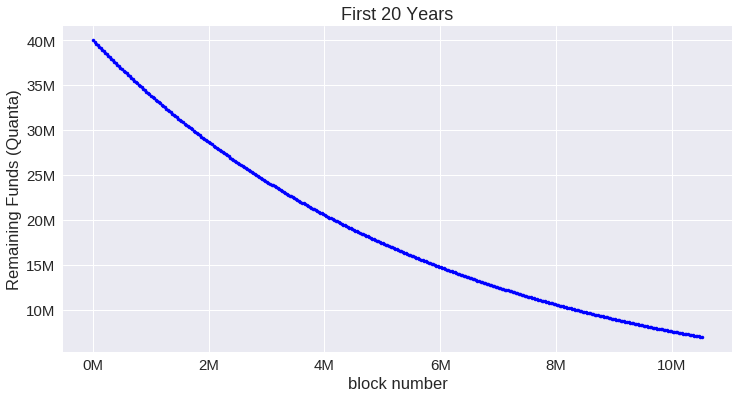

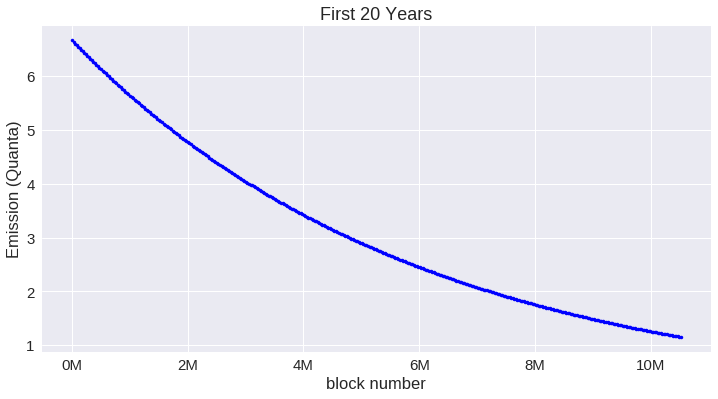

In [226]:
def PlotCharts(X, title, use_millions=True):
  # Plot results
  Y = remaining_funds_shor(X) * 10**-9
  fig = plt.figure(figsize=(12, 6))
  plt.plot(X, Y, 'b.')
  plt.title(title)
  
  if use_millions:
    ax = plt.gca().yaxis.set_major_formatter(formatter)
    ax = plt.gca().xaxis.set_major_formatter(formatter)

  plt.xlabel(r'block number')
  plt.ylabel(r'Remaining Funds (Quanta)')
  plt.show()

  dY = emission_shor(X) * 10**-9
  fig = plt.figure(figsize=(12, 6))
  plt.plot(X, dY, 'b.')
  plt.title(title)
  ax = plt.gca().xaxis.set_major_formatter(formatter)
  plt.xlabel(r'block number')
  plt.ylabel(r'Emission (Quanta)')
  plt.show()

X = np.linspace(0., TOTAL_MINUTES/200*20, 400)
PlotCharts(X, "First 20 Years")

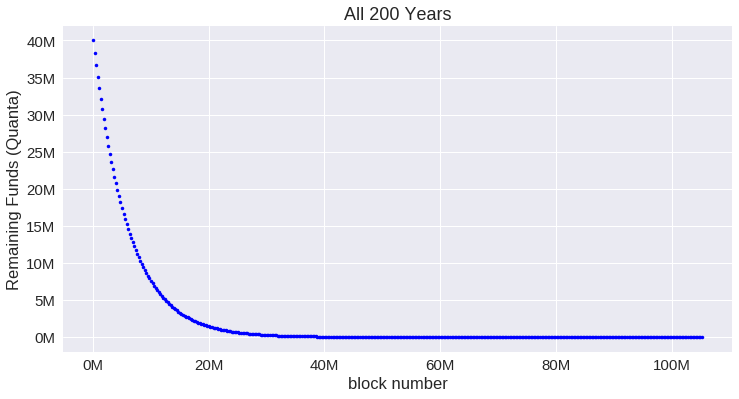

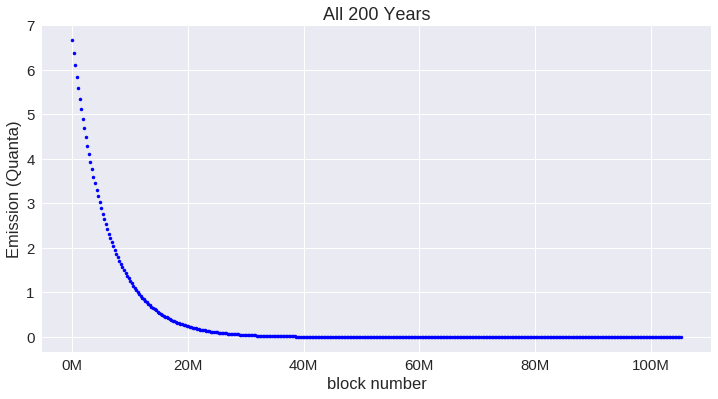

In [227]:
X = np.linspace(0., TOTAL_MINUTES, 400)
PlotCharts(X, "All 200 Years")

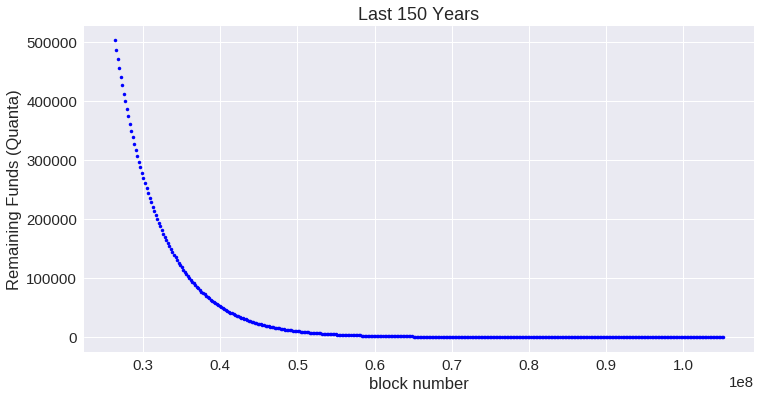

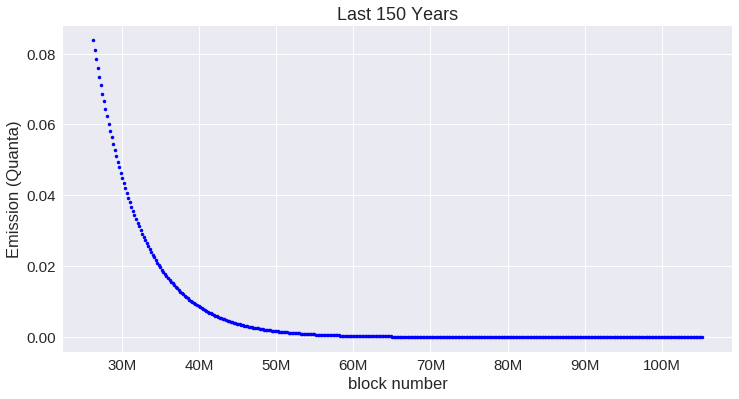

In [228]:
X = np.linspace(TOTAL_MINUTES - TOTAL_MINUTES/200*150, TOTAL_MINUTES, 400)
PlotCharts(X, "Last 150 Years", use_millions=False)